In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
RECORDINGS_FOLDER_PATH = "dataset/recordings"

## Lengths

In [3]:
def calculate_audio_lengths(directory, sample_rate=16000):
    lengths = []

    for file in os.listdir(directory):
        if file.endswith(".wav"):
            path = os.path.join(directory, file)
            y, sr = librosa.load(path, sr=sample_rate)
            duration = len(y) / sr  # seconds
            lengths.append(duration)

    return np.array(lengths)

In [4]:
lengths = calculate_audio_lengths(RECORDINGS_FOLDER_PATH)

In [7]:
def plot_audio_lengths(lengths):
    plt.hist(lengths, bins=30, edgecolor='black')
    plt.xlabel("Duration (seconds)")
    plt.ylabel("Number of recordings")
    plt.title("Histogram of Audio Durations")
    plt.show()

    print(f"Min: {lengths.min():.2f}s")
    print(f"Max: {lengths.max():.2f}s")
    print(f"Mean: {lengths.mean():.2f}s")
    print(f"Median: {np.median(lengths):.2f}s")
    print(f"Standard Deviation: {lengths.std():.2f}s")

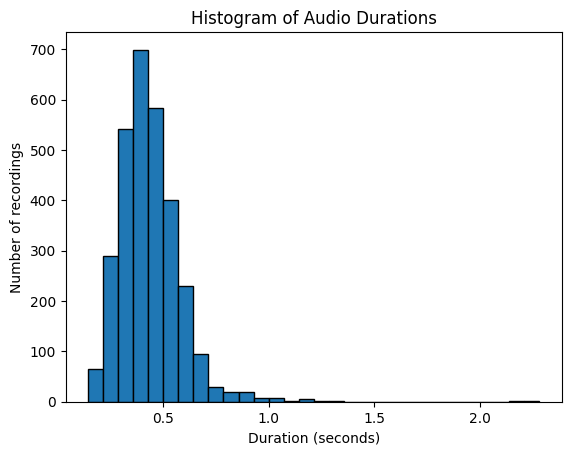

Min: 0.14s
Max: 2.28s
Mean: 0.44s
Median: 0.42s
Standard Deviation: 0.15s


In [9]:
plot_audio_lengths(lengths)

Using the histogram, we can determine that 0.9s is a good maximum duration for our recordings, as the vast majority of recordings are below this length.

In [13]:
def plot_length_by_digit(lengths):
    plt.figure(figsize=(10, 6))

    for label in range(10):
        label_lengths = lengths[label*300:(label+1)*300]
        plt.hist(label_lengths, bins=30, alpha=0.5, label=f"Digit {label}")

    plt.xlabel("Duration (seconds)")
    plt.ylabel("Number of recordings")
    plt.title("Audio Durations by Digit")
    plt.legend()
    plt.show()

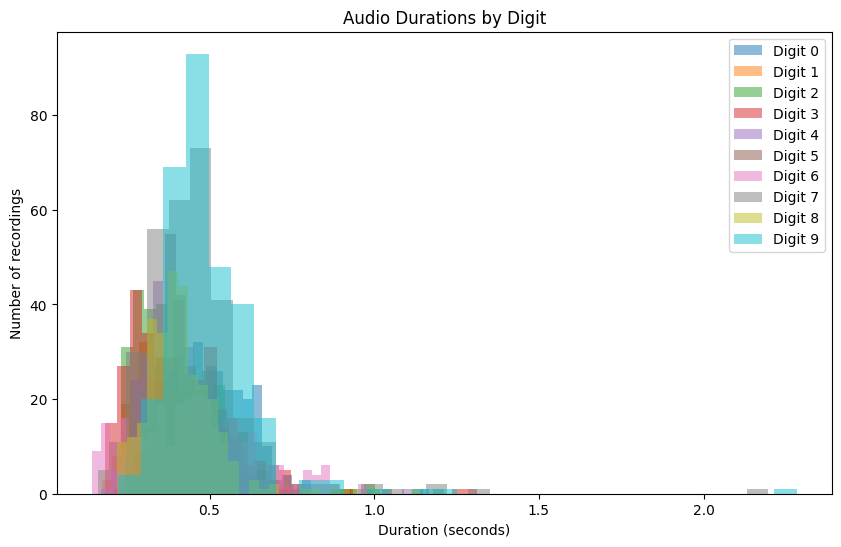

In [14]:
plot_length_by_digit(lengths)

In [20]:
def plot_length_mean_std_by_digit(lengths):
    means = []
    stds = []

    for digit in range(10):
        digit_lengths = lengths[digit*300:(digit+1)*300]
        means.append(np.mean(digit_lengths))
        stds.append(np.std(digit_lengths))

    plt.figure(figsize=(10, 6))
    plt.bar(range(10), means, yerr=stds, capsize=5)
    plt.xlabel("Digit")
    plt.ylabel("Duration (seconds)")
    plt.title("Mean and Standard Deviation of Audio Durations by Digit")
    plt.xticks(range(10))
    plt.show()

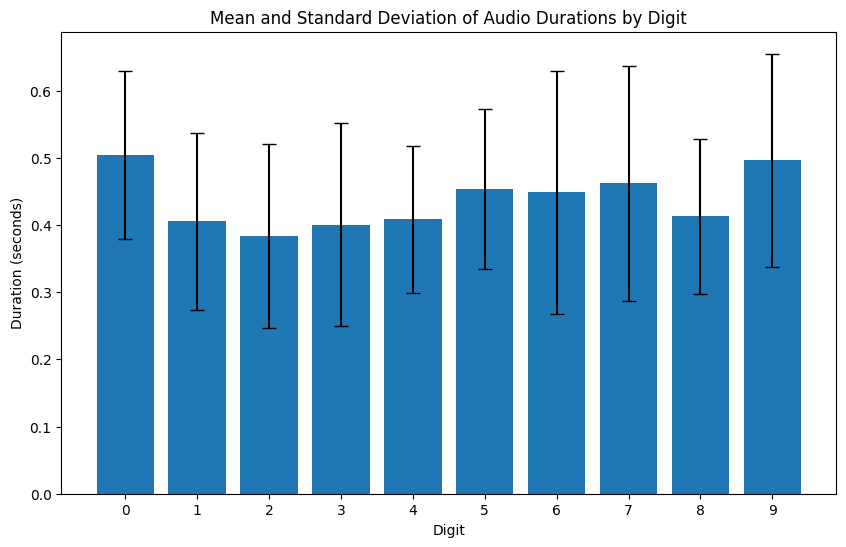

In [21]:
plot_length_mean_std_by_digit(lengths)

In [23]:
def plot_length_mean_std_by_speaker(lengths):
    plt.figure(figsize=(10, 6))

    speakers = range(6)
    means = []
    stds = []

    for speaker in speakers:
        speaker_lengths = []
        for digit in range(10):
            start = speaker * 300 + digit * 50
            end = start + 50
            speaker_lengths.extend(lengths[start:end])
        means.append(np.mean(speaker_lengths))
        stds.append(np.std(speaker_lengths))

    plt.bar(speakers, means, yerr=stds, capsize=5)
    plt.xlabel("Speaker")
    plt.ylabel("Duration (seconds)")
    plt.title("Mean and Standard Deviation of Audio Durations by Speaker")
    plt.xticks(speakers)
    plt.show()

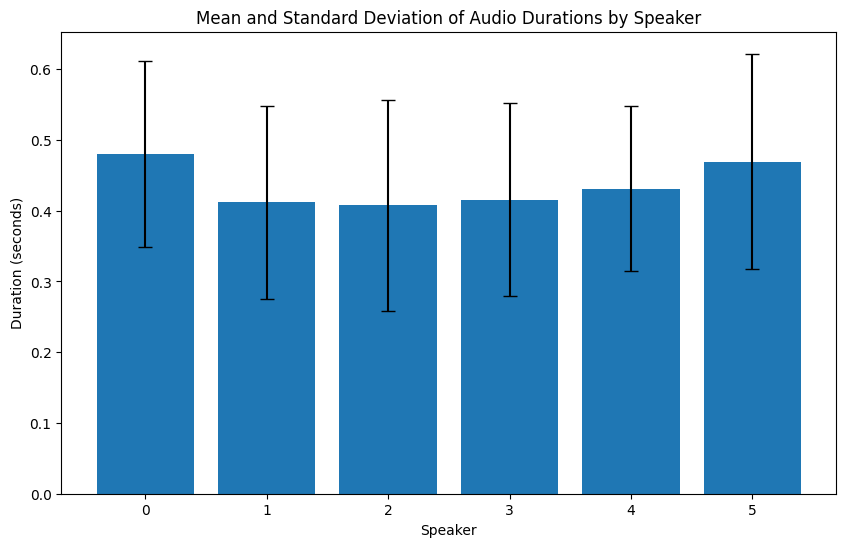

In [24]:
plot_length_mean_std_by_speaker(lengths)